<a href="https://colab.research.google.com/github/hida0/Python_MachineLearning/blob/sklearn/sklearn_3_%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8_%EC%98%A4%EC%B0%A8%ED%8F%89%EA%B0%80%EC%A7%80%ED%91%9C_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_%EB%A6%BF%EC%A7%80_%EB%9D%BC%EC%8F%98_%EC%97%98%EB%9D%BC%EC%8A%A4%ED%8B%B1%EB%84%B7_%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%9F%AC_%ED%8C%8C%EC%9D%B4%ED%94%84%EB%9D%BC%EC%9D%B8_%EB%8B%A4%EC%A4%91%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Supervised learning(지도학습) - Linear models : [도큐먼트](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)


## 1. 회귀 (regression) 예측
**수치형 값**을 예측 (Y의 값이 연속된 수치로 표현)


예시
- 주택 가격 예측
- 매출액 예측

In [ ]:
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True) # 아주 작은 소수값도 e를 사용하지 않고 그냥 나타내도록 지정

sklearn의 dataset으로부터 사용할 보스턴 집값 데이터를 로드한다.

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
print(boston['DESCR']) # 13개의 설명변수

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

boston['data']은 설명변수가 되는 X 데이터, boston['feature_names']은 설명변수들의 이름입니다.

In [ ]:
data = boston['data']
column_names = boston['feature_names']

In [ ]:
df = pd.DataFrame(data, columns=column_names)

종속변수이자 Y 데이터인 boston['target']을 price로 저장하고 데이터프레임에 추가 합니다.

In [ ]:
price = boston['target']
df['MEDV'] = price

In [ ]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


df의 변수들인 13가지 **컬럼 소개**
* **CRIM**: 범죄율
* **ZN**: 25,000 평방 피트 당 주거용 토지의 비율
* **INDUS**: 비소매(non-retail) 비즈니스 면적 비율
* **CHAS**: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)
* **NOX**: 산화 질소 농도 (천만 분의 1)
* **RM**: 주거 당 평균 객실 수
* **AGE**: 1940 년 이전에 건축된 자가 소유 점유 비율
* **DIS**: 5 개의 보스턴 고용 센터까지의 가중 거리     
* **RAD**: 고속도로 접근성 지수
* **TAX**: 10,000 달러 당 전체 가치 재산 세율
* **PTRATIO**: 도시 별 학생-교사 비율
* **B**: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.
* **LSTAT**: 인구의 낮은 지위
* **MEDV**: 자가 주택의 중앙값 (1,000 달러 단위), y값

**train_test_split**을 이용하여 train / test 데이터를 분할합니다.

In [ ]:
from sklearn.model_selection import train_test_split

x 변수에는 MEDV열을 drop한 설명변수로만, y 변수에는 MEDV로만 구성된 데이터가 되도록 나눈다.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', axis=1), df['MEDV'])

In [ ]:
x_train.shape, x_test.shape

((379, 13), (127, 13))

In [ ]:
x_train.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
320,0.16760,0.0,7.38,0.0,0.493,6.426,52.3,4.5404,5.0,287.0,19.6,396.90,7.20
176,0.07022,0.0,4.05,0.0,0.510,6.020,47.2,3.5549,5.0,296.0,16.6,393.23,10.11
159,1.42502,0.0,19.58,0.0,0.871,6.510,100.0,1.7659,5.0,403.0,14.7,364.31,7.39


In [ ]:
y_train.head(3)

320    23.8
176    23.2
159    23.3
Name: MEDV, dtype: float64

## 2. 회귀 모델의 평가 지표

### 2-1. MSE (Mean Squared Error)
예측값과 실제값의 차이에 대한 **제곱에 대하여 평균**을 낸 값

${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

### 2-2. MAE (Mean Absolute Error)
예측값과 실제값의 차이에 대한 **절대값에 대하여 평균**을 낸 값

$(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$

### 2-3. RMSE (Root Mean Squared Error)
예측값과 실제값의 차이에 대한 **제곱에 대하여 평균을 낸 뒤 루트**를 씌운

$\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$


### 2-4. 평가 지표 만들어 보기

In [ ]:
import numpy as np

In [ ]:
pred = np.array([3, 4, 5])
actual = np.array([1, 2, 3])

In [ ]:
def my_mse(pred, actual):
    return ((pred - actual)**2).mean()

In [ ]:
my_mse(pred, actual)

4.0

In [ ]:
def my_mae(pred, actual):
    return np.abs(pred - actual).mean()

In [ ]:
my_mae(pred, actual)

2.0

In [ ]:
def my_rmse(pred, actual):
    return np.sqrt(my_mse(pred, actual))

In [ ]:
my_rmse(pred, actual)

2.0

### 2-5. sklearn의 평가지표 활용하기

In [ ]:
# MAE 모듈
from sklearn.metrics import mean_absolute_error

In [ ]:
my_mae(pred, actual), mean_absolute_error(pred, actual)

(2.0, 2.0)

In [ ]:
# MSE 모듈
from sklearn.metrics import mean_squared_error

In [ ]:
my_mse(pred, actual), mean_squared_error(pred, actual)

(4.0, 4.0)

## 3. 모델별 성능 확인을 위한 함수

### 3-1. 예측값과 실제값의 산점도 그래프를 그려서 비교하는 함수

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(9, 6))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

### 3-2. 각 알고리즘에 따른 예측값과 실제값의 MSE 값을 그래프로 나타내는 함수, 알고리즘 간의 비교에 유용

In [ ]:
def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual) # 정의한 함수를 통해 산점도 그래프를 그림

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True) # MSE 값에 대해 내림차순으로 정리

    df = pd.DataFrame(y_value, columns=['model', 'mse']) # 모델이름과 MSE 값의 데이터프레임 생성
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10

    length = len(df)

    plt.figure(figsize=(8, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=13)
    bars = ax.barh(np.arange(len(df)), df['mse']) # MSE 값을 수평막대그래프로 그림

    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')

    plt.title('MSE Error', fontsize=15)
    plt.xlim(min_, max_)

    plt.show()

### 3-3. 그렸던 그림을 제거하는 함수

In [ ]:
def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

## 4. Linear Regression : 선형 회귀

선형 회귀에 대한 parameter : [도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression(n_jobs=-1)

* n_jobs: CPU코어의 사용

In [ ]:
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [ ]:
pred_lr = lr.predict(x_test)

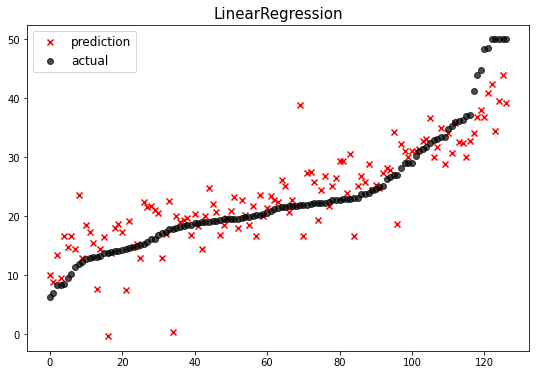

              model       mse
0  LinearRegression  26.18211


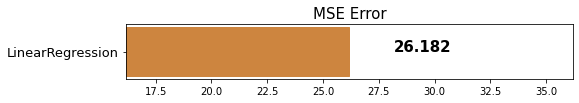

In [ ]:
mse_eval('LinearRegression', pred_lr, y_test)

## 5. 규제 (Regularization)
학습이 과대적합 되는 것을 방지하고자 일종의 **penalty**를 부여하는 것

L2 규제가 L1 규제에 비해 더 안정적이라 일반적으로는 L2규제가 더 많이 사용된다.

### 5-1. **L2 규제** (L2 Regularization)

* 각 **가중치 제곱의 합**에 규제 강도(Regularization Strength)인 λ를 곱한다.
* λ를 크게 하면 가중치가 더 많이 감소되고(규제를 중요시함),
  
  λ를 작게 하면 가중치가 증가한다.(규제를 중요시하지 않음)
* 예) 릿지(Ridge)


### 5-2. **L1 규제** (L1 Regularization)

* 가중치의 제곱의 합이 아닌 **가중치의 합을 더한 값**에 규제 강도인(Regularization Strength) λ를 곱하여 오차에 더한다.

* 어떤 가중치(w)는 실제로 **0이 된다**. 즉, **모델에서 완전히 제외**되는 특성이 생기는 것이다.
* 예) 라쏘(Lasso)


### 5-3. **릿지(Ridge)** - L2 규제
각 **가중치 제곱의 합**에 규제 강도(Regularization Strength)인 λ를 곱한다.

$Error=MSE+αw^2$

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# 값이 커질수록 큰 규제입니다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

alpha 값이 달라지면 각 릿지 모델의 MSE 값이 어떻게 나타나는지 그래프를 통해 비교해본다.

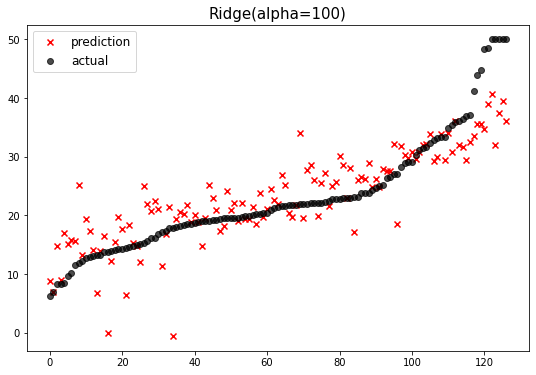

              model        mse
0  Ridge(alpha=100)  29.917755
1  LinearRegression  26.182110


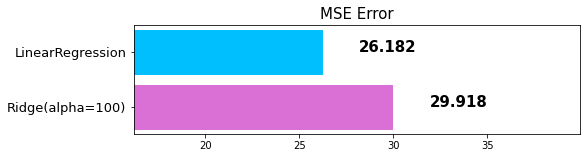

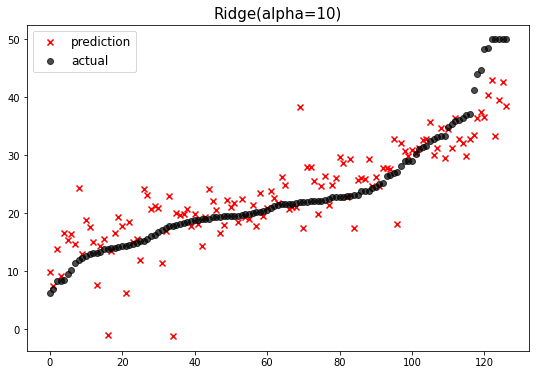

              model        mse
0  Ridge(alpha=100)  29.917755
1   Ridge(alpha=10)  27.769708
2  LinearRegression  26.182110


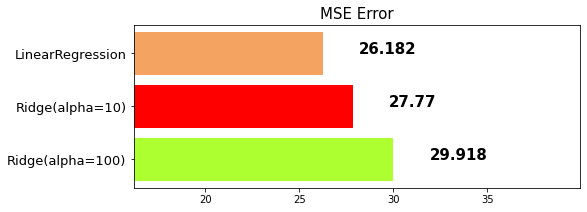

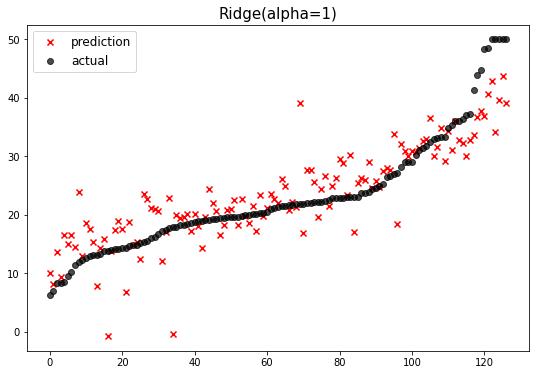

              model        mse
0  Ridge(alpha=100)  29.917755
1   Ridge(alpha=10)  27.769708
2    Ridge(alpha=1)  26.872206
3  LinearRegression  26.182110


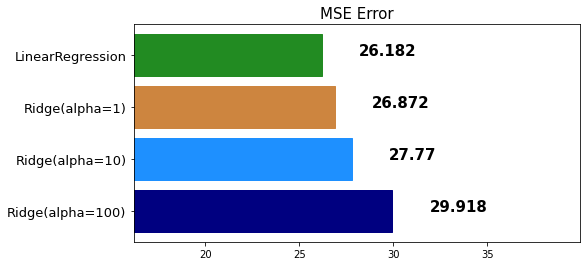

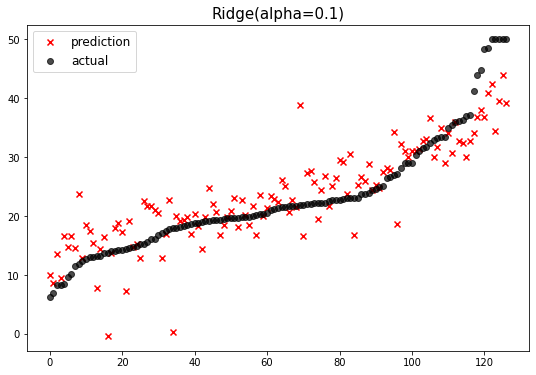

              model        mse
0  Ridge(alpha=100)  29.917755
1   Ridge(alpha=10)  27.769708
2    Ridge(alpha=1)  26.872206
3  Ridge(alpha=0.1)  26.283175
4  LinearRegression  26.182110


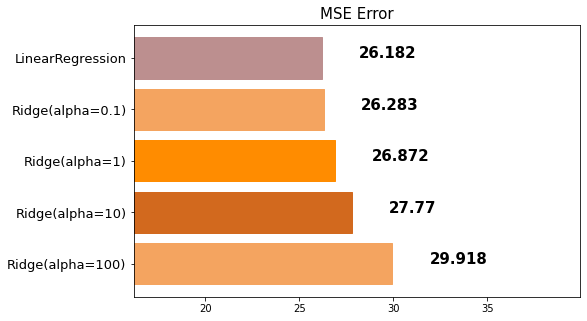

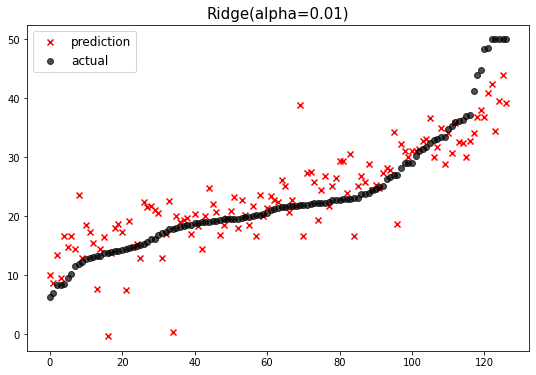

               model        mse
0   Ridge(alpha=100)  29.917755
1    Ridge(alpha=10)  27.769708
2     Ridge(alpha=1)  26.872206
3   Ridge(alpha=0.1)  26.283175
4  Ridge(alpha=0.01)  26.192647
5   LinearRegression  26.182110


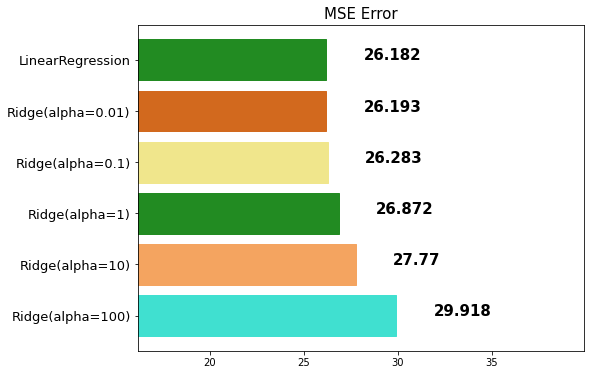

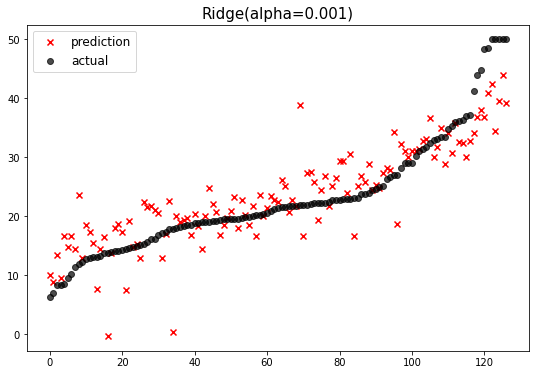

                model        mse
0    Ridge(alpha=100)  29.917755
1     Ridge(alpha=10)  27.769708
2      Ridge(alpha=1)  26.872206
3    Ridge(alpha=0.1)  26.283175
4   Ridge(alpha=0.01)  26.192647
5  Ridge(alpha=0.001)  26.183168
6    LinearRegression  26.182110


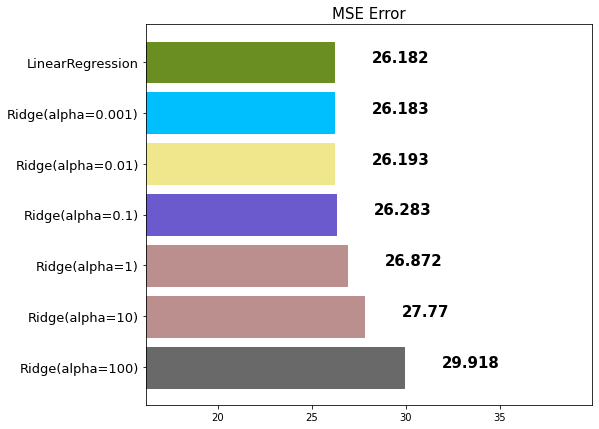

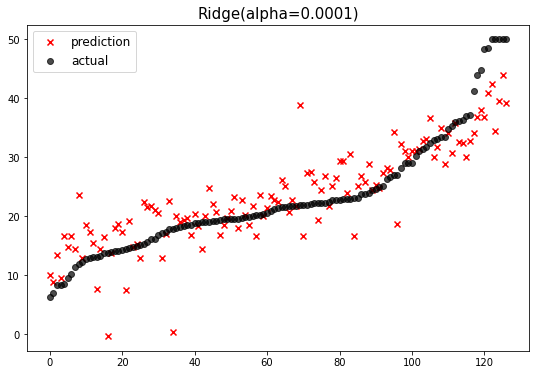

                 model        mse
0     Ridge(alpha=100)  29.917755
1      Ridge(alpha=10)  27.769708
2       Ridge(alpha=1)  26.872206
3     Ridge(alpha=0.1)  26.283175
4    Ridge(alpha=0.01)  26.192647
5   Ridge(alpha=0.001)  26.183168
6  Ridge(alpha=0.0001)  26.182216
7     LinearRegression  26.182110


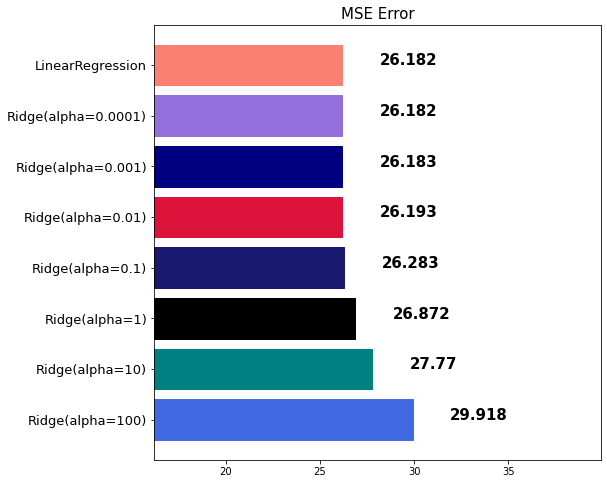

In [ ]:
for alpha in alphas:
    ridge = Ridge(alpha=alpha) # 모델선언
    ridge.fit(x_train, y_train) # 모델학습
    pred = ridge.predict(x_test) # 예측
    mse_eval('Ridge(alpha={})'.format(alpha), pred, y_test) # 각 모델의 MSE 값을 수평막대그래프로 비교

In [ ]:
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [ ]:
ridge.coef_

array([ -0.09964761,   0.04407478,   0.08258195,   3.31156188,
       -14.17917424,   3.46959734,   0.00431045,  -1.378591  ,
         0.28483198,  -0.01271778,  -0.81292205,   0.00993925,
        -0.62552702])

In [ ]:
# 모델에 따른 각 열의 설명계수를 수평막대그래프로 그려서 나타내는 함수
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True) # coef 값을 내림차순으로 정렬

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    #fig.tight_layout()
    plt.show()

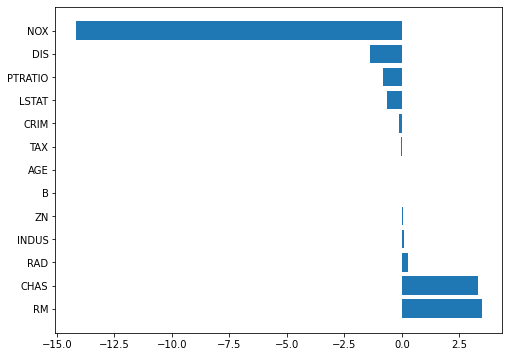

In [ ]:
plot_coef(x_train.columns, ridge.coef_)

각각의 alpha 값에 따른 모델의 coef 값들을 확인한다.

In [ ]:
# alpha=100인 릿지 모델을 선언, 학습, 예측
ridge_100 = Ridge(alpha=100)
ridge_100.fit(x_train, y_train)
ridge_pred_100 = ridge_100.predict(x_test)

# alpha=0.001인 릿지 모델을 선언, 학습, 예측
ridge_0001 = Ridge(alpha=0.001)
ridge_0001.fit(x_train, y_train)
ridge_pred_0001 = ridge_0001.predict(x_test)

In [ ]:
ridge_100.coef_

array([-0.09330706,  0.04676596,  0.02950521,  0.67484581, -0.16096277,
        1.86348121,  0.00756896, -1.06688748,  0.30205445, -0.01626543,
       -0.73511724,  0.00985225, -0.76028839])

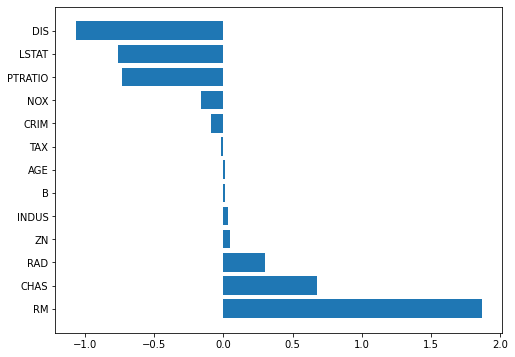

In [ ]:
plot_coef(x_train.columns, ridge_100.coef_)

In [ ]:
ridge_0001.coef_

array([ -0.09964035,   0.0440762 ,   0.08253417,   3.31145595,
       -14.16840391,   3.46966599,   0.00430014,  -1.37844863,
         0.28480281,  -0.01271871,  -0.81279551,   0.00993948,
        -0.62554418])

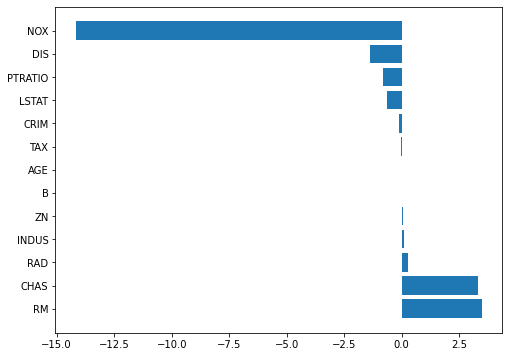

In [ ]:
plot_coef(x_train.columns, ridge_0001.coef_)

### 5-4. **라쏘(Lasso)** - L1 규제
**가중치의 합을 더한 값**에 규제 강도인(Regularization Strength) λ를 곱하여 오차에 더한다.

$Error=MSE+α|w|$

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# 값이 커질수록 큰 규제입니다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

그림을 편하게 보기 위해 위에서 그린 릿지 모델들의 MSE 값 그래프를 삭제한다.

In [ ]:
for alpha in alphas:
    remove_model('Ridge(alpha={})'.format(alpha))

alpha 값이 달라지면 각 라쏘 모델의 MSE 값이 어떻게 나타나는지 그래프를 통해 비교해본다.

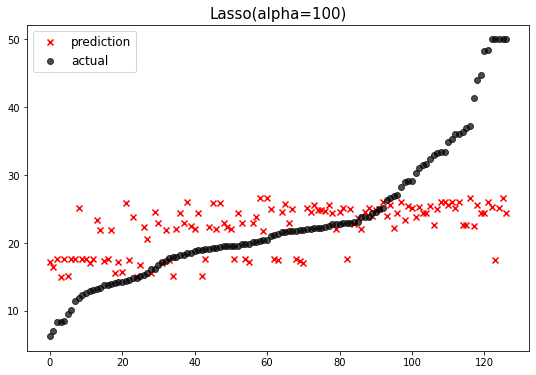

              model        mse
0  Lasso(alpha=100)  74.374668
1  LinearRegression  26.182110


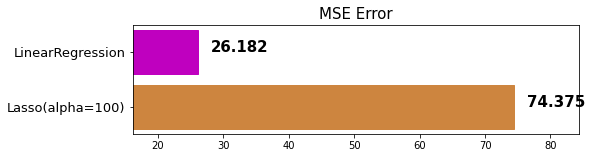

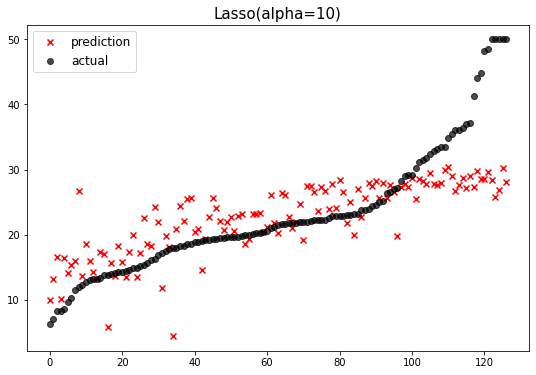

              model        mse
0  Lasso(alpha=100)  74.374668
1   Lasso(alpha=10)  49.494783
2  LinearRegression  26.182110


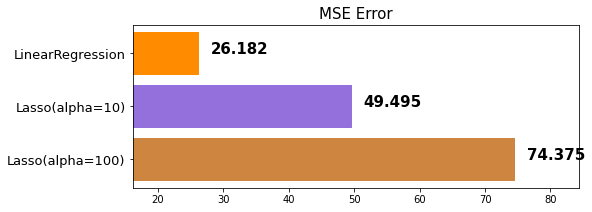

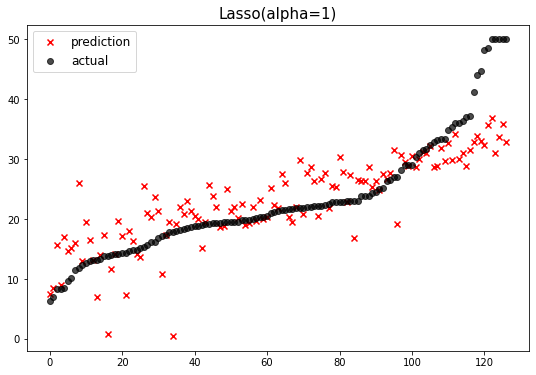

              model        mse
0  Lasso(alpha=100)  74.374668
1   Lasso(alpha=10)  49.494783
2    Lasso(alpha=1)  34.949188
3  LinearRegression  26.182110


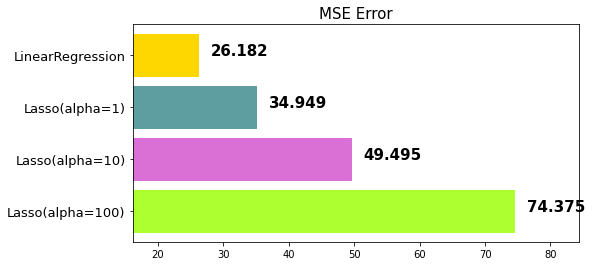

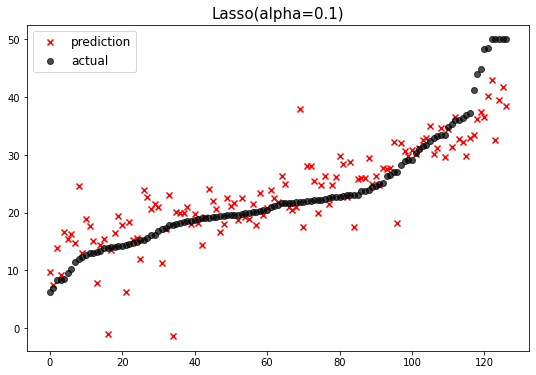

              model        mse
0  Lasso(alpha=100)  74.374668
1   Lasso(alpha=10)  49.494783
2    Lasso(alpha=1)  34.949188
3  Lasso(alpha=0.1)  27.893593
4  LinearRegression  26.182110


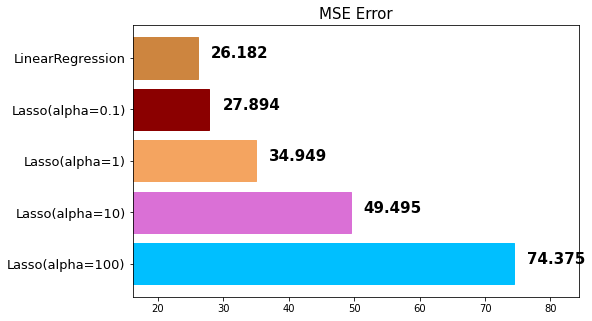

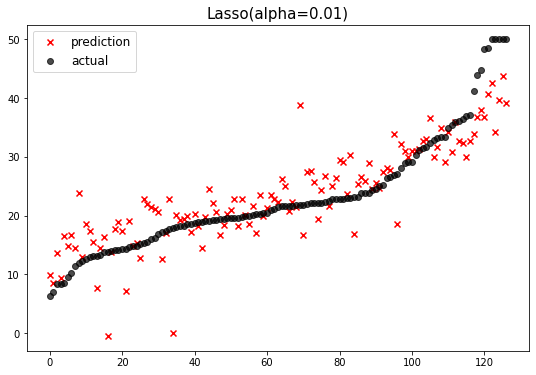

               model        mse
0   Lasso(alpha=100)  74.374668
1    Lasso(alpha=10)  49.494783
2     Lasso(alpha=1)  34.949188
3   Lasso(alpha=0.1)  27.893593
4  Lasso(alpha=0.01)  26.481823
5   LinearRegression  26.182110


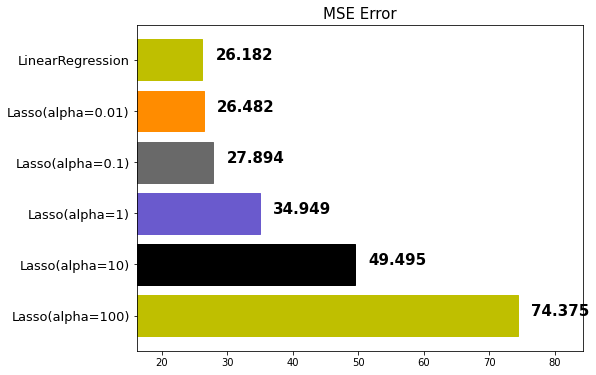

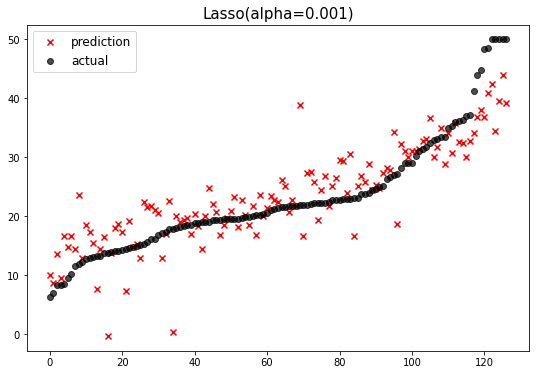

                model        mse
0    Lasso(alpha=100)  74.374668
1     Lasso(alpha=10)  49.494783
2      Lasso(alpha=1)  34.949188
3    Lasso(alpha=0.1)  27.893593
4   Lasso(alpha=0.01)  26.481823
5  Lasso(alpha=0.001)  26.209256
6    LinearRegression  26.182110


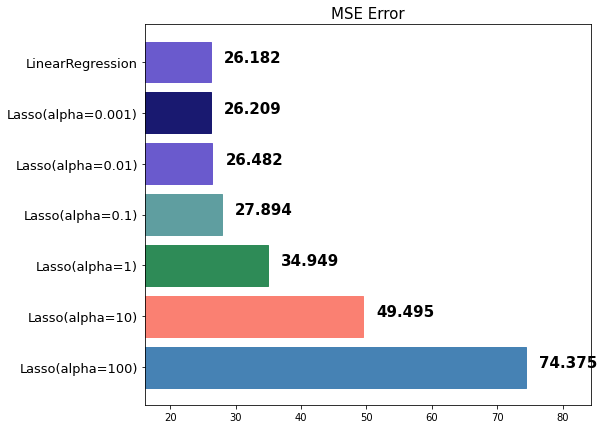

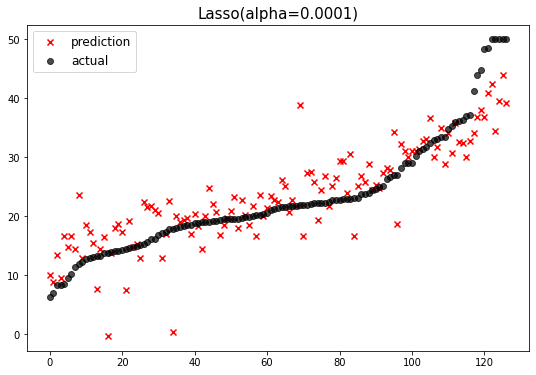

                 model        mse
0     Lasso(alpha=100)  74.374668
1      Lasso(alpha=10)  49.494783
2       Lasso(alpha=1)  34.949188
3     Lasso(alpha=0.1)  27.893593
4    Lasso(alpha=0.01)  26.481823
5   Lasso(alpha=0.001)  26.209256
6  Lasso(alpha=0.0001)  26.184796
7     LinearRegression  26.182110


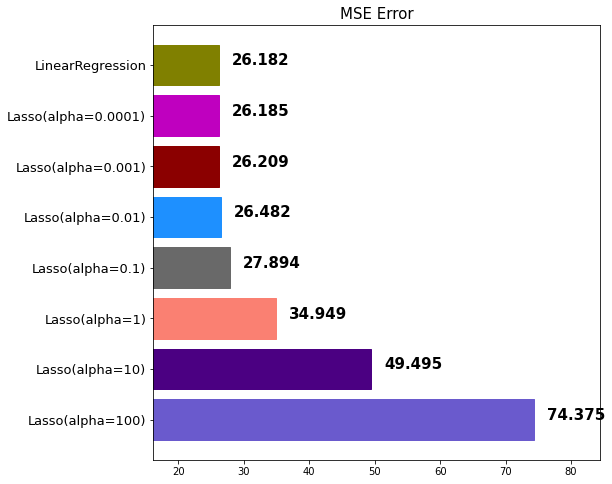

In [ ]:
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    mse_eval('Lasso(alpha={})'.format(alpha), pred, y_test)

각각의 alpha 값에 따른 모델의 coef 값들을 확인한다.

In [ ]:
# alpha=100인 라쏘 모델을 선언, 학습, 예측
lasso_100 = Lasso(alpha=100)
lasso_100.fit(x_train, y_train)
lasso_pred_100 = lasso_100.predict(x_test)

# alpha=0.001인 라쏘 모델을 선언, 학습, 예측
lasso_0001 = Lasso(alpha=0.001)
lasso_0001.fit(x_train, y_train)
lasso_pred_0001 = lasso_0001.predict(x_test)

In [ ]:
lasso_100.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.01905241,
       -0.        ,  0.00673442, -0.        ])

다음과 같이 lasso 모델은 실제로 coef 값으로 **0이 많이 나타난다.**

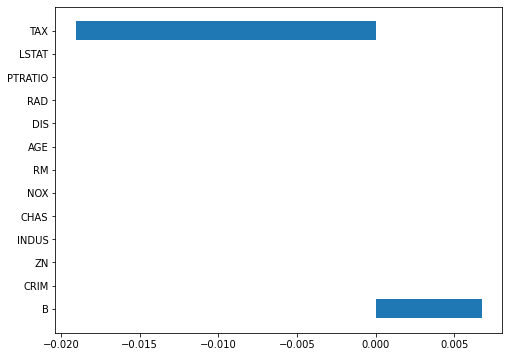

In [ ]:
plot_coef(x_train.columns, lasso_100.coef_)

In [ ]:
lasso_0001.coef_

array([ -0.09942084,   0.04410355,   0.08112516,   3.29656887,
       -13.8530214 ,   3.46966288,   0.00403511,  -1.37390975,
         0.28397793,  -0.01274749,  -0.80913837,   0.00994763,
        -0.62618354])

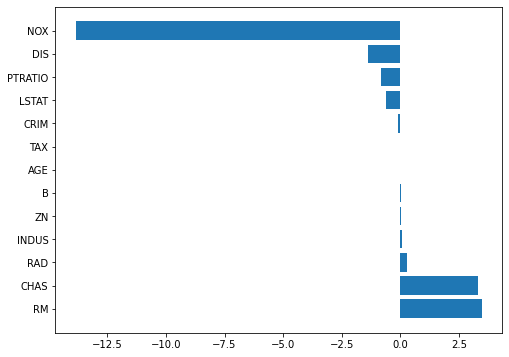

In [ ]:
plot_coef(x_train.columns, lasso_0001.coef_)

## 6. ElasticNet : 엘라스틱넷
L1 규제와 L2 규제의 혼합형

**l1_ratio (default=0.5)** parameter를 조절

 * l1_ratio = 0 (L2 규제만 사용)
 * l1_ratio = 1 (L1 규제만 사용)
 * 0 < l1_ratio < 1 (L1 and L2 규제의 혼합사용)

In [ ]:
from sklearn.linear_model import ElasticNet

그림을 편하게 보기 위해 위에서 그린 라쏘 모델들의 MSE 값 그래프를 삭제한다.

In [ ]:
for alpha in alphas:
    remove_model('Lasso(alpha={})'.format(alpha))

In [ ]:
ratios = [0.2, 0.5, 0.8]

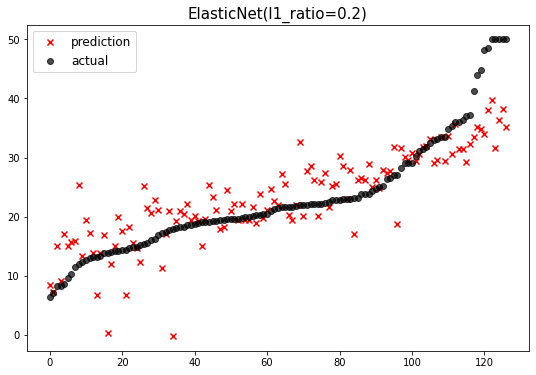

                      model        mse
0  ElasticNet(l1_ratio=0.2)  31.142311
1          LinearRegression  26.182110


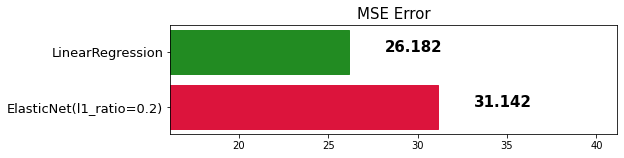

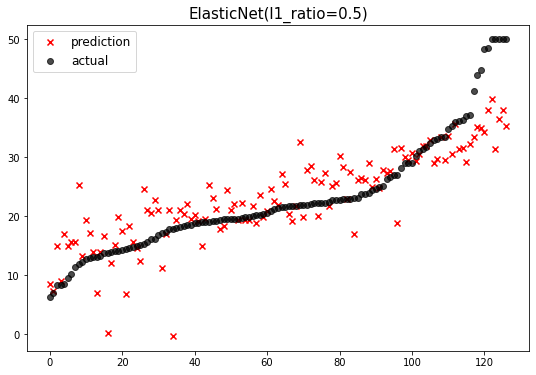

                      model        mse
0  ElasticNet(l1_ratio=0.2)  31.142311
1  ElasticNet(l1_ratio=0.5)  30.854348
2          LinearRegression  26.182110


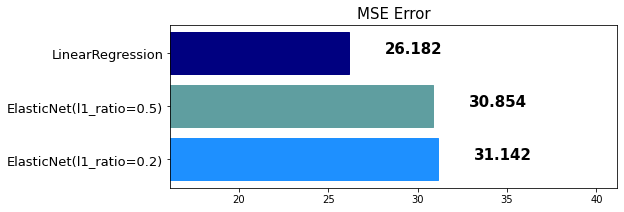

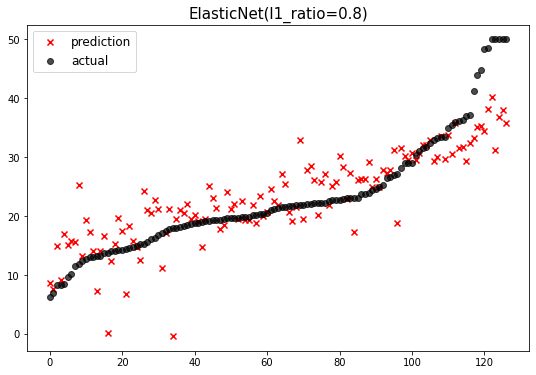

                      model        mse
0  ElasticNet(l1_ratio=0.2)  31.142311
1  ElasticNet(l1_ratio=0.5)  30.854348
2  ElasticNet(l1_ratio=0.8)  30.387220
3          LinearRegression  26.182110


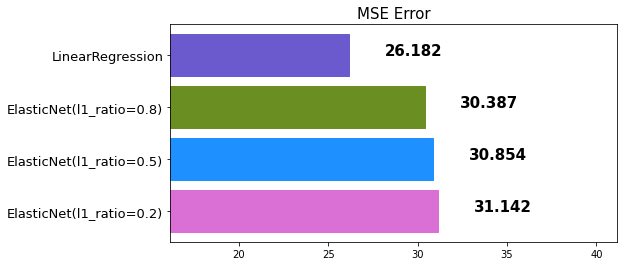

In [ ]:
for ratio in ratios:
    elasticnet = ElasticNet(alpha=0.5, l1_ratio=ratio)
    elasticnet.fit(x_train, y_train)
    pred = elasticnet.predict(x_test)
    mse_eval('ElasticNet(l1_ratio={})'.format(ratio), pred, y_test)

각각의 l1 ratio 값에 따른 모델의 coef 값들을 확인한다.

In [ ]:
# l1 ratio=0.2인 엘라스틱넷 모델을 선언, 학습, 예측
elasticnet_20 = ElasticNet(alpha=5, l1_ratio=0.2)
elasticnet_20.fit(x_train, y_train)
elasticnet_pred_20 = elasticnet_20.predict(x_test)

# l1 ratio=0.8인 엘라스틱넷 모델을 선언, 학습, 예측
elasticnet_80 = ElasticNet(alpha=5, l1_ratio=0.8)
elasticnet_80.fit(x_train, y_train)
elasticnet_pred_80 = elasticnet_80.predict(x_test)

In [ ]:
elasticnet_20.coef_

array([-0.06008901,  0.02942853,  0.        ,  0.        , -0.        ,
        0.09559889,  0.03588049, -0.22931609,  0.15643914, -0.01119377,
       -0.35206383,  0.00879738, -0.77082683])

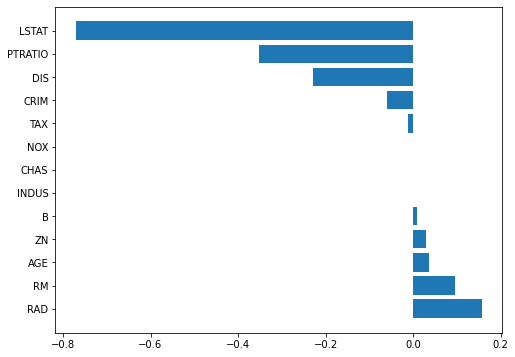

In [ ]:
plot_coef(x_train.columns, elasticnet_20.coef_)

In [ ]:
elasticnet_80.coef_

array([-0.        ,  0.01730858,  0.        ,  0.        ,  0.        ,
        0.        ,  0.03542684, -0.        ,  0.        , -0.00657681,
       -0.        ,  0.00822117, -0.78158052])

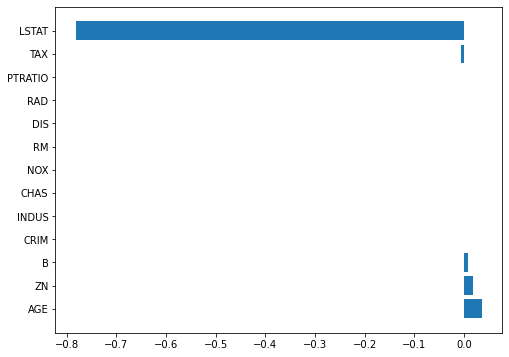

In [ ]:
plot_coef(x_train.columns, elasticnet_80.coef_)

## 7. Scaler
데이터의 전처리 과정으로 데이터의 범위를 알맞게 조절한다.

**sklearn.preprocessing**으로부터 알맞은 모듈을 임포트하여 사용한다.

In [ ]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.889394,11.251979,10.990317,0.068602,0.555023,6.256111,68.138259,3.872621,9.514512,406.472296,18.422955,356.443219,12.788127
std,9.485171,22.800619,6.823147,0.253110,0.119554,0.672186,28.100447,2.164336,8.677751,167.458172,2.161184,91.943821,7.147157
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082100,0.000000,5.130000,0.000000,0.447500,5.882000,43.900000,2.106750,4.000000,281.000000,16.900000,374.960000,7.240000
50%,0.259150,0.000000,8.560000,0.000000,0.524000,6.193000,76.000000,3.279700,5.000000,330.000000,19.000000,391.130000,11.380000
75%,3.764975,17.750000,18.100000,0.000000,0.631000,6.594000,94.050000,5.287300,24.000000,666.000000,20.200000,396.175000,17.100000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.398000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


### 7-1. StandardScaler : 표준화
**평균(mean)을 0, 표준편차(std)를 1**로 만들어 주는 스케일러

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# 모델 선언
std_scaler = StandardScaler()

In [ ]:
# 모델 학습 및 적용
std_scaled = std_scaler.fit_transform(x_train) # 배열에 저장

In [ ]:
round(pd.DataFrame(std_scaled).describe(), 2) # 배열로부터 데이터프레임을 만들어서 통계값을 소수 둘째짜리 반올림하여 살펴보기

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.41,-0.49,-1.55,-0.27,-1.42,-4.01,-2.32,-1.27,-0.98,-1.31,-2.70,-3.88,-1.55
25%,-0.40,-0.49,-0.86,-0.27,-0.90,-0.56,-0.86,-0.82,-0.64,-0.75,-0.71,0.20,-0.78
50%,-0.38,-0.49,-0.36,-0.27,-0.26,-0.09,0.28,-0.27,-0.52,-0.46,0.27,0.38,-0.20
75%,-0.01,0.29,1.04,-0.27,0.64,0.50,0.92,0.65,1.67,1.55,0.82,0.43,0.60
max,8.98,3.90,2.46,3.68,2.65,3.19,1.14,3.82,1.67,1.82,1.66,0.44,3.39


### 7-2. MinMaxScaler
**min값과 max값을 0~1**사이로 정규화

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# 모델 선언
minmax_scaler = MinMaxScaler()

In [ ]:
# 모델 학습 및 적용
minmax_scaled = minmax_scaler.fit_transform(x_train) # 배열에 저장

In [ ]:
round(pd.DataFrame(minmax_scaled).describe(), 2) # 배열로부터 데이터프레임을 만들어서 통계값을 소수 둘째짜리 반올림하여 살펴보기

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.04,0.12,0.38,0.08,0.35,0.52,0.67,0.28,0.36,0.41,0.61,0.89,0.30
std,0.10,0.24,0.26,0.27,0.24,0.14,0.29,0.22,0.38,0.32,0.23,0.24,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.16,0.00,0.13,0.44,0.43,0.10,0.13,0.17,0.46,0.94,0.14
50%,0.00,0.00,0.29,0.00,0.29,0.51,0.76,0.22,0.17,0.27,0.65,0.99,0.27
75%,0.04,0.12,0.64,0.00,0.49,0.59,0.93,0.42,0.65,0.91,0.81,1.00,0.42
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### 7-3. RobustScaler
**중앙값(median)이 0, IQR(interquartile range)이 1**이 되도록 변환

outlier 값 처리에 유용

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
# 모델 선언
robust_scaler = RobustScaler() # 배열에 저장

In [ ]:
# 모델 학습 및 적용
robust_scaled = robust_scaler.fit_transform(x_train) # 배열로부터 데이터프레임을 만들어서 통계값을 소수 둘째짜리 반올림하여 살펴보기

In [ ]:
round(pd.DataFrame(robust_scaled).median(), 2)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
dtype: float64

## 8. 파이프라인
여러가지 모듈을 하나의 모델로 작성하여 실행할 수 있도록 하는 것

sklearn.pipeline 의 **make_pipeline** 모듈을 임포트한다.

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(l1_ratio=0.2, alpha=0.01)
)

In [ ]:
# 모델 학습과 예측을 한번에 진행함
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)

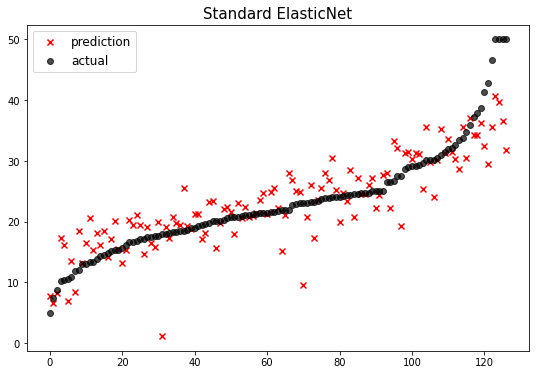

                 model        mse
0  Standard ElasticNet  21.740675


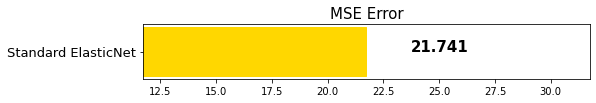

In [ ]:
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

In [ ]:
# 위에 그린 그림을 제거
remove_model('Standard ElasticNet')

In [ ]:
# 파이프라인을 사용하지 않고 진행
elasticnet_no_pipeline = ElasticNet(l1_ratio=0.2, alpha=0.01) # 모델 선언

In [ ]:
no_pipeline_pred = elasticnet_no_pipeline.fit(x_train, y_train).predict(x_test) # 모델 학습과 예측

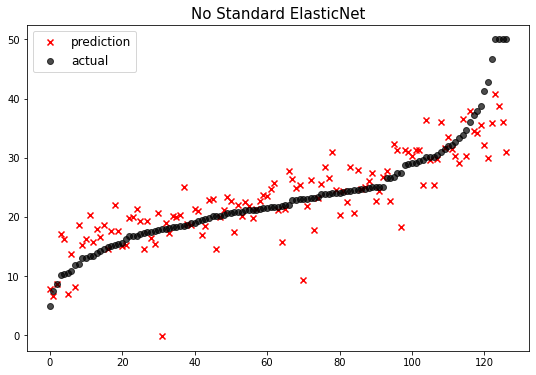

                    model        mse
0  No Standard ElasticNet  22.742241


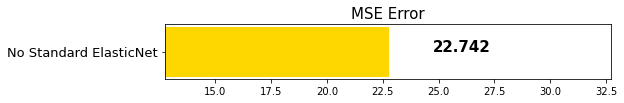

In [ ]:
mse_eval('No Standard ElasticNet', no_pipeline_pred, y_test)

### 9. Polynomial Regression : 다중 회귀

다중 회귀에 대한 parameter : [도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=poly%20feature#sklearn.preprocessing.PolynomialFeatures)

다항식의 계수간 상호작용을 통해 다중 회귀의 **새로운 설명변수 feature를 생성**합니다.
몇 개의 설명변수간의 상호작용을 포함할 것인지는 **degree**로 지정합니다.

예를들어 [a, b] 2개의 설명변수(feature)가 존재한다고 가정하고 degree=2로 설정한다면,

다중 회귀의 설명변수는 [1, a, b, a^2, ab, b^2] 가 됩니다.

In [ ]:
x_train.iloc[0]

CRIM         0.09604
ZN          40.00000
INDUS        6.41000
CHAS         0.00000
NOX          0.44700
RM           6.85400
AGE         42.80000
DIS          4.26730
RAD          4.00000
TAX        254.00000
PTRATIO     17.60000
B          396.90000
LSTAT        2.98000
Name: 275, dtype: float64

다중 회귀를 진행하기 위해서는 sklearn.preprocessing에서 **PolynomialFeatures**를 임포트한다.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# 모델 선언
poly = PolynomialFeatures(degree=2, include_bias=False)

In [ ]:
# 모델 학습과 적용
poly.fit_transform(x_train)[0] # 13개 외에는 교효작용으로 생성된 것들

array([     0.09604   ,     40.        ,      6.41      ,      0.        ,
            0.447     ,      6.854     ,     42.8       ,      4.2673    ,
            4.        ,    254.        ,     17.6       ,    396.9       ,
            2.98      ,      0.00922368,      3.8416    ,      0.6156164 ,
            0.        ,      0.04292988,      0.65825816,      4.110512  ,
            0.40983149,      0.38416   ,     24.39416   ,      1.690304  ,
           38.118276  ,      0.2861992 ,   1600.        ,    256.4       ,
            0.        ,     17.88      ,    274.16      ,   1712.        ,
          170.692     ,    160.        ,  10160.        ,    704.        ,
        15876.        ,    119.2       ,     41.0881    ,      0.        ,
            2.86527   ,     43.93414   ,    274.348     ,     27.353393  ,
           25.64      ,   1628.14      ,    112.816     ,   2544.129     ,
           19.1018    ,      0.        ,      0.        ,      0.        ,
            0.        ,  

In [ ]:
# 파이프라인으로 다중 회귀, 표준화, 엘라스틱넷 알고리즘을 모두 사용하는 모델을 생성
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [ ]:
# 모델 학습
poly_pipeline.fit(x_train, y_train)

In [ ]:
# 예측
poly_pred = poly_pipeline.predict(x_test)

In [ ]:
# 위에 그린 그림을 제거
remove_model('No Standard ElasticNet')

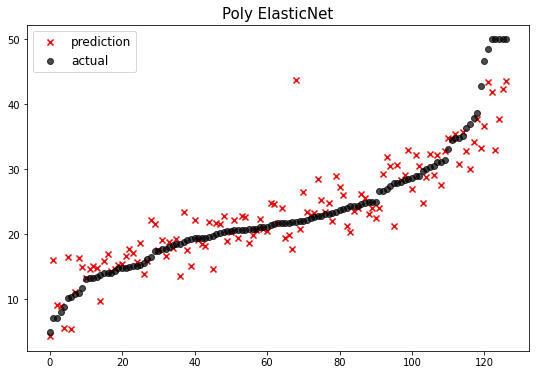

             model        mse
0  Poly ElasticNet  17.582632


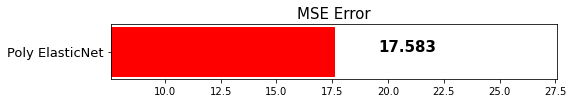

In [ ]:
mse_eval('Poly ElasticNet', poly_pred, y_test)